# Part 8 -- Plotting Transformed Features

Plotting SVD and t-SNE to see relationships in our data and identify features with the most variance.

**Load lib codes**

In [6]:
from os import chdir
chdir('/home/jovyan/work/Analyzing_Unstructured_Data_for_Finance/Analyzing_Unstructured_Data_for_Finance/')

from lib import *
# suppress_warnings()
%matplotlib inline

In [8]:
X_tfidf = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/6.X_tfidf')

In [9]:
y_le = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/5.y_le.pickle')

In [26]:
from sklearn.decomposition import PCA

In [27]:
PCA = PCA(n_components = 50, random_state=42)
PCA_tfidf = PCA.fit_transform(X_tfidf.todense())

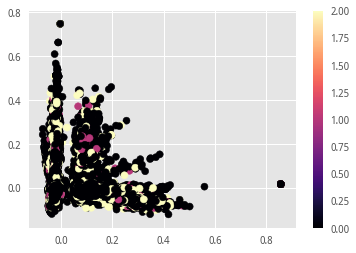

In [28]:
plt.scatter(PCA_tfidf.T[0], PCA_tfidf.T[1], c=y_le, cmap='magma')
plt.colorbar()

In [23]:
SVD_tfidf = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/')

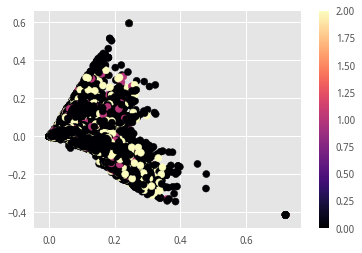

In [24]:
plt.scatter(SVD_tfidf.T[0], SVD_tfidf.T[1], c=y_le, cmap='magma')
plt.colorbar()

In [89]:
joblib.dump(SVD_tfidf_10000, '../predicting_stock_market_trends_with_Twitter/data/SVD_tfidf_10000.pickle')

['../predicting_stock_market_trends_with_Twitter/data/SVD_tfidf_10000.pickle']

In [21]:
TSNE_SVD_tfidf = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/8.2.1.TSNE_SVD_tfidf.pickle')

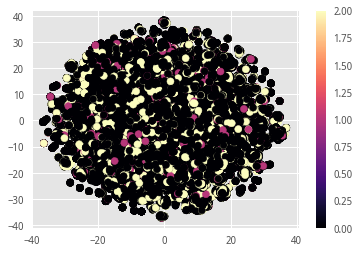

In [22]:
plt.scatter(TSNE_SVD_tfidf.T[0], TSNE_SVD_tfidf.T[1], c=y_le, cmap='magma')
plt.colorbar()

**Feature selection**<br>
Find the features that contribute to the most variance. Go back and add them to StopWords to see if our data has better predictive scores.

In [404]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE

In [337]:
#use a lasso to see if there are any important PCA components and look at the features in those components:
lasso = Lasso()
lasso.fit(PCA_tfidf, y_le)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [344]:
coefs = list(zip(range(len(X_tfidf.indices)),lasso.coef_))
coefs.sort(key=lambda x: abs(x[1]), reverse=True)
coefs[:4]

[(0, -0.0), (1, -0.0), (2, 0.0), (3, -0.0)]

In [348]:
important_components = [i for i,_ in coefs[:4]]

In [349]:
PCA.components_[important_components].shape

(4, 5268)

In [360]:
range(len(X_tfidf.indices))

range(0, 458191)

In [367]:
for i, component in enumerate(PCA.components_[important_components]):
    print(i)
    print(len(component))

0
5268
1
5268
2
5268
3
5268


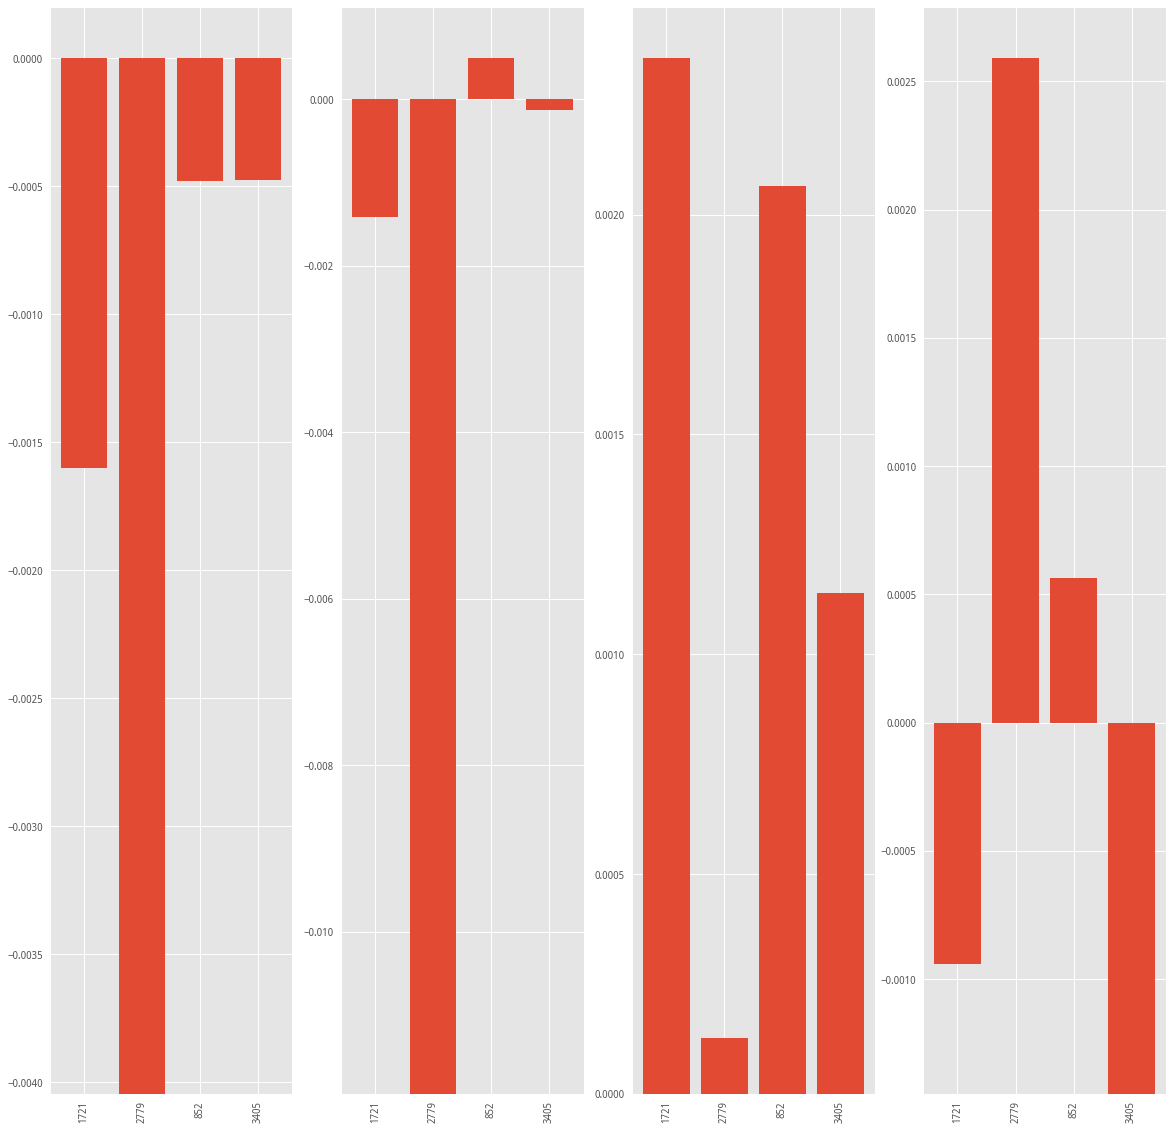

In [373]:
fig = plt.figure(figsize=(20,20))
for i, component in enumerate(PCA.components_[important_components]):
    fig.add_subplot(1,4,1+i)
    plt.bar(list(range(4)), component[:4])
    plt.xticks(list(range(4)), X_tfidf.indices, rotation=90)

In [374]:
pca_results = list(zip(X_tfidf.indices,
                       np.sum(abs(PCA.components_[important_components]),
                              axis=0)))

In [375]:
pca_results

[(1721, 0.0063100354989024813),
 (2779, 0.018710486664386822),
 (852, 0.0036006202915427358),
 (3405, 0.0031939306268981239),
 (2848, 0.003012472674595337),
 (4246, 0.0027725008532673806),
 (4696, 0.0031169961717449676),
 (337, 0.001886314151380212),
 (3405, 0.0020692626550981395),
 (2848, 0.0015200725960271156),
 (2164, 0.04029806348973234),
 (2569, 0.0044419157000276672),
 (5204, 0.0022007080104945826),
 (333, 0.003956649488398703),
 (4421, 0.0022519948361270528),
 (4896, 0.0017628445078003562),
 (1658, 0.00089913562414021826),
 (2159, 0.002800865073032384),
 (2832, 0.0071435474813189587),
 (1342, 0.0080194691490570787),
 (2236, 0.007362129009357201),
 (3944, 0.009479716541490284),
 (4433, 0.0021928134966232773),
 (2488, 0.014805982813853053),
 (4054, 0.0015691274049582547),
 (2475, 0.0019839650602105495),
 (1653, 0.0024540788160426581),
 (1883, 0.0023762093297403511),
 (2129, 0.0019880333738881285),
 (183, 0.0010516038585804907),
 (3115, 0.014067450829596817),
 (3653, 0.003417875322

In [376]:
pca_results.sort(key=lambda x: abs(x[1]), reverse=True)
pca_results[:10]

[(1572, 1.2063540951352087),
 (4369, 1.1098117513515096),
 (584, 1.0623186929241681),
 (2573, 0.93459438131211814),
 (2161, 0.73285160728675403),
 (222, 0.70437259469580948),
 (2229, 0.51463260808037747),
 (4720, 0.50506976094613665),
 (1465, 0.17379137973271774),
 (5083, 0.17377946188099103)]

In [398]:
X_tfidf.indices[1572]

4087

In [400]:
print(X_tfidf)

  (0, 1721)	0.420259575143
  (0, 2779)	0.28418985747
  (0, 852)	0.429610581896
  (0, 3405)	0.227793734992
  (0, 2848)	0.354158200259
  (0, 4246)	0.443010067431
  (0, 4696)	0.367883086812
  (0, 337)	0.221672868019
  (1, 3405)	0.224456647802
  (1, 2848)	0.348969924149
  (1, 2164)	0.447031655151
  (1, 2569)	0.350594399939
  (1, 5204)	0.44474207264
  (1, 333)	0.293223720926
  (1, 4421)	0.341841757901
  (1, 4896)	0.323193474851
  (2, 1658)	0.479207235897
  (2, 2159)	0.454600871483
  (2, 2832)	0.387309342811
  (2, 1342)	0.499399386559
  (2, 2236)	0.405327273185
  (3, 3944)	0.682593081242
  (3, 4433)	0.561685416622
  (3, 2488)	0.467521313091
  (4, 4054)	0.265589076861
  :	:
  (67998, 1937)	0.418462800559
  (67998, 3473)	0.566315131574
  (67998, 879)	0.400512505398
  (67998, 803)	0.586315435
  (67999, 2638)	0.528922416569
  (67999, 2407)	0.474630768314
  (67999, 507)	0.479637491829
  (67999, 2007)	0.514698540364
  (68000, 4998)	0.480530466457
  (68000, 718)	0.458378831981
  (68000, 1909)	0.484

In [401]:
X_tfidf.indices[0]

1721

In [403]:
print(X_tfidf[1721])

  (0, 5181)	0.199366293217
  (0, 224)	0.277772713622
  (0, 1)	0.21106151642
  (0, 2480)	0.22513156507
  (0, 5044)	0.320924246243
  (0, 2)	0.314532950437
  (0, 2013)	0.190891293347
  (0, 3735)	0.252536077713
  (0, 2195)	0.253193507243
  (0, 4904)	0.30241871375
  (0, 3158)	0.20915249252
  (0, 4905)	0.333842795085
  (0, 2017)	0.289612644786
  (0, 1466)	0.301813880924


In [381]:
X['cleaned_text'][1572]

'the president just rejected keystonexl add your name to support strong action on climate change actonclimate'

In [407]:
# start = datetime.now()

# rfe = RFE(Lasso(), n_features_to_select=10, verbose=1)
# rfe.fit(X_tfidf, y_le)

# end = datetime.now()
# print(end - start)

Fitting estimator with 5268 features.
Fitting estimator with 5267 features.
Fitting estimator with 5266 features.
Fitting estimator with 5265 features.
Fitting estimator with 5264 features.
Fitting estimator with 5263 features.
Fitting estimator with 5262 features.
Fitting estimator with 5261 features.
Fitting estimator with 5260 features.
Fitting estimator with 5259 features.
Fitting estimator with 5258 features.
Fitting estimator with 5257 features.
Fitting estimator with 5256 features.
Fitting estimator with 5255 features.
Fitting estimator with 5254 features.
Fitting estimator with 5253 features.
Fitting estimator with 5252 features.
Fitting estimator with 5251 features.
Fitting estimator with 5250 features.
Fitting estimator with 5249 features.
Fitting estimator with 5248 features.
Fitting estimator with 5247 features.
Fitting estimator with 5246 features.
Fitting estimator with 5245 features.
Fitting estimator with 5244 features.
Fitting estimator with 5243 features.
Fitting esti

Fitting estimator with 5052 features.
Fitting estimator with 5051 features.
Fitting estimator with 5050 features.
Fitting estimator with 5049 features.
Fitting estimator with 5048 features.
Fitting estimator with 5047 features.
Fitting estimator with 5046 features.
Fitting estimator with 5045 features.
Fitting estimator with 5044 features.
Fitting estimator with 5043 features.
Fitting estimator with 5042 features.
Fitting estimator with 5041 features.
Fitting estimator with 5040 features.
Fitting estimator with 5039 features.
Fitting estimator with 5038 features.
Fitting estimator with 5037 features.
Fitting estimator with 5036 features.
Fitting estimator with 5035 features.
Fitting estimator with 5034 features.
Fitting estimator with 5033 features.
Fitting estimator with 5032 features.
Fitting estimator with 5031 features.
Fitting estimator with 5030 features.
Fitting estimator with 5029 features.
Fitting estimator with 5028 features.
Fitting estimator with 5027 features.
Fitting esti

Fitting estimator with 4836 features.
Fitting estimator with 4835 features.
Fitting estimator with 4834 features.
Fitting estimator with 4833 features.
Fitting estimator with 4832 features.
Fitting estimator with 4831 features.
Fitting estimator with 4830 features.
Fitting estimator with 4829 features.
Fitting estimator with 4828 features.
Fitting estimator with 4827 features.
Fitting estimator with 4826 features.
Fitting estimator with 4825 features.
Fitting estimator with 4824 features.
Fitting estimator with 4823 features.
Fitting estimator with 4822 features.
Fitting estimator with 4821 features.
Fitting estimator with 4820 features.
Fitting estimator with 4819 features.
Fitting estimator with 4818 features.
Fitting estimator with 4817 features.
Fitting estimator with 4816 features.
Fitting estimator with 4815 features.
Fitting estimator with 4814 features.
Fitting estimator with 4813 features.
Fitting estimator with 4812 features.
Fitting estimator with 4811 features.
Fitting esti

Fitting estimator with 4620 features.
Fitting estimator with 4619 features.
Fitting estimator with 4618 features.
Fitting estimator with 4617 features.
Fitting estimator with 4616 features.
Fitting estimator with 4615 features.
Fitting estimator with 4614 features.
Fitting estimator with 4613 features.
Fitting estimator with 4612 features.
Fitting estimator with 4611 features.
Fitting estimator with 4610 features.
Fitting estimator with 4609 features.
Fitting estimator with 4608 features.
Fitting estimator with 4607 features.
Fitting estimator with 4606 features.
Fitting estimator with 4605 features.
Fitting estimator with 4604 features.
Fitting estimator with 4603 features.
Fitting estimator with 4602 features.
Fitting estimator with 4601 features.
Fitting estimator with 4600 features.
Fitting estimator with 4599 features.
Fitting estimator with 4598 features.
Fitting estimator with 4597 features.
Fitting estimator with 4596 features.
Fitting estimator with 4595 features.
Fitting esti

Fitting estimator with 4404 features.
Fitting estimator with 4403 features.
Fitting estimator with 4402 features.
Fitting estimator with 4401 features.
Fitting estimator with 4400 features.
Fitting estimator with 4399 features.
Fitting estimator with 4398 features.
Fitting estimator with 4397 features.
Fitting estimator with 4396 features.
Fitting estimator with 4395 features.
Fitting estimator with 4394 features.
Fitting estimator with 4393 features.
Fitting estimator with 4392 features.
Fitting estimator with 4391 features.
Fitting estimator with 4390 features.
Fitting estimator with 4389 features.
Fitting estimator with 4388 features.
Fitting estimator with 4387 features.
Fitting estimator with 4386 features.
Fitting estimator with 4385 features.
Fitting estimator with 4384 features.
Fitting estimator with 4383 features.
Fitting estimator with 4382 features.
Fitting estimator with 4381 features.
Fitting estimator with 4380 features.
Fitting estimator with 4379 features.
Fitting esti

Fitting estimator with 4188 features.
Fitting estimator with 4187 features.
Fitting estimator with 4186 features.
Fitting estimator with 4185 features.
Fitting estimator with 4184 features.
Fitting estimator with 4183 features.
Fitting estimator with 4182 features.
Fitting estimator with 4181 features.
Fitting estimator with 4180 features.
Fitting estimator with 4179 features.
Fitting estimator with 4178 features.
Fitting estimator with 4177 features.
Fitting estimator with 4176 features.
Fitting estimator with 4175 features.
Fitting estimator with 4174 features.
Fitting estimator with 4173 features.
Fitting estimator with 4172 features.
Fitting estimator with 4171 features.
Fitting estimator with 4170 features.
Fitting estimator with 4169 features.
Fitting estimator with 4168 features.
Fitting estimator with 4167 features.
Fitting estimator with 4166 features.
Fitting estimator with 4165 features.
Fitting estimator with 4164 features.
Fitting estimator with 4163 features.
Fitting esti

Fitting estimator with 3972 features.
Fitting estimator with 3971 features.
Fitting estimator with 3970 features.
Fitting estimator with 3969 features.
Fitting estimator with 3968 features.
Fitting estimator with 3967 features.
Fitting estimator with 3966 features.
Fitting estimator with 3965 features.
Fitting estimator with 3964 features.
Fitting estimator with 3963 features.
Fitting estimator with 3962 features.
Fitting estimator with 3961 features.
Fitting estimator with 3960 features.
Fitting estimator with 3959 features.
Fitting estimator with 3958 features.
Fitting estimator with 3957 features.
Fitting estimator with 3956 features.
Fitting estimator with 3955 features.
Fitting estimator with 3954 features.
Fitting estimator with 3953 features.
Fitting estimator with 3952 features.
Fitting estimator with 3951 features.
Fitting estimator with 3950 features.
Fitting estimator with 3949 features.
Fitting estimator with 3948 features.
Fitting estimator with 3947 features.
Fitting esti

Fitting estimator with 3756 features.
Fitting estimator with 3755 features.
Fitting estimator with 3754 features.
Fitting estimator with 3753 features.
Fitting estimator with 3752 features.
Fitting estimator with 3751 features.
Fitting estimator with 3750 features.
Fitting estimator with 3749 features.
Fitting estimator with 3748 features.
Fitting estimator with 3747 features.
Fitting estimator with 3746 features.
Fitting estimator with 3745 features.
Fitting estimator with 3744 features.
Fitting estimator with 3743 features.
Fitting estimator with 3742 features.
Fitting estimator with 3741 features.
Fitting estimator with 3740 features.
Fitting estimator with 3739 features.
Fitting estimator with 3738 features.
Fitting estimator with 3737 features.
Fitting estimator with 3736 features.
Fitting estimator with 3735 features.
Fitting estimator with 3734 features.
Fitting estimator with 3733 features.
Fitting estimator with 3732 features.
Fitting estimator with 3731 features.
Fitting esti

Fitting estimator with 3540 features.
Fitting estimator with 3539 features.
Fitting estimator with 3538 features.
Fitting estimator with 3537 features.
Fitting estimator with 3536 features.
Fitting estimator with 3535 features.
Fitting estimator with 3534 features.
Fitting estimator with 3533 features.
Fitting estimator with 3532 features.
Fitting estimator with 3531 features.
Fitting estimator with 3530 features.
Fitting estimator with 3529 features.
Fitting estimator with 3528 features.
Fitting estimator with 3527 features.
Fitting estimator with 3526 features.
Fitting estimator with 3525 features.
Fitting estimator with 3524 features.
Fitting estimator with 3523 features.
Fitting estimator with 3522 features.
Fitting estimator with 3521 features.
Fitting estimator with 3520 features.
Fitting estimator with 3519 features.
Fitting estimator with 3518 features.
Fitting estimator with 3517 features.
Fitting estimator with 3516 features.
Fitting estimator with 3515 features.
Fitting esti

Fitting estimator with 3324 features.
Fitting estimator with 3323 features.
Fitting estimator with 3322 features.
Fitting estimator with 3321 features.
Fitting estimator with 3320 features.
Fitting estimator with 3319 features.
Fitting estimator with 3318 features.
Fitting estimator with 3317 features.
Fitting estimator with 3316 features.
Fitting estimator with 3315 features.
Fitting estimator with 3314 features.
Fitting estimator with 3313 features.
Fitting estimator with 3312 features.
Fitting estimator with 3311 features.
Fitting estimator with 3310 features.
Fitting estimator with 3309 features.
Fitting estimator with 3308 features.
Fitting estimator with 3307 features.
Fitting estimator with 3306 features.
Fitting estimator with 3305 features.
Fitting estimator with 3304 features.
Fitting estimator with 3303 features.
Fitting estimator with 3302 features.
Fitting estimator with 3301 features.
Fitting estimator with 3300 features.
Fitting estimator with 3299 features.
Fitting esti

Fitting estimator with 3108 features.
Fitting estimator with 3107 features.
Fitting estimator with 3106 features.
Fitting estimator with 3105 features.
Fitting estimator with 3104 features.
Fitting estimator with 3103 features.
Fitting estimator with 3102 features.
Fitting estimator with 3101 features.
Fitting estimator with 3100 features.
Fitting estimator with 3099 features.
Fitting estimator with 3098 features.
Fitting estimator with 3097 features.
Fitting estimator with 3096 features.
Fitting estimator with 3095 features.
Fitting estimator with 3094 features.
Fitting estimator with 3093 features.
Fitting estimator with 3092 features.
Fitting estimator with 3091 features.
Fitting estimator with 3090 features.
Fitting estimator with 3089 features.
Fitting estimator with 3088 features.
Fitting estimator with 3087 features.
Fitting estimator with 3086 features.
Fitting estimator with 3085 features.
Fitting estimator with 3084 features.
Fitting estimator with 3083 features.
Fitting esti

Fitting estimator with 2892 features.
Fitting estimator with 2891 features.
Fitting estimator with 2890 features.
Fitting estimator with 2889 features.
Fitting estimator with 2888 features.
Fitting estimator with 2887 features.
Fitting estimator with 2886 features.
Fitting estimator with 2885 features.
Fitting estimator with 2884 features.
Fitting estimator with 2883 features.
Fitting estimator with 2882 features.
Fitting estimator with 2881 features.
Fitting estimator with 2880 features.
Fitting estimator with 2879 features.
Fitting estimator with 2878 features.
Fitting estimator with 2877 features.
Fitting estimator with 2876 features.
Fitting estimator with 2875 features.
Fitting estimator with 2874 features.
Fitting estimator with 2873 features.
Fitting estimator with 2872 features.
Fitting estimator with 2871 features.
Fitting estimator with 2870 features.
Fitting estimator with 2869 features.
Fitting estimator with 2868 features.
Fitting estimator with 2867 features.
Fitting esti

Fitting estimator with 2676 features.
Fitting estimator with 2675 features.
Fitting estimator with 2674 features.
Fitting estimator with 2673 features.
Fitting estimator with 2672 features.
Fitting estimator with 2671 features.
Fitting estimator with 2670 features.
Fitting estimator with 2669 features.
Fitting estimator with 2668 features.
Fitting estimator with 2667 features.
Fitting estimator with 2666 features.
Fitting estimator with 2665 features.
Fitting estimator with 2664 features.
Fitting estimator with 2663 features.
Fitting estimator with 2662 features.
Fitting estimator with 2661 features.
Fitting estimator with 2660 features.
Fitting estimator with 2659 features.
Fitting estimator with 2658 features.
Fitting estimator with 2657 features.
Fitting estimator with 2656 features.
Fitting estimator with 2655 features.
Fitting estimator with 2654 features.
Fitting estimator with 2653 features.
Fitting estimator with 2652 features.
Fitting estimator with 2651 features.
Fitting esti

Fitting estimator with 2460 features.
Fitting estimator with 2459 features.
Fitting estimator with 2458 features.
Fitting estimator with 2457 features.
Fitting estimator with 2456 features.
Fitting estimator with 2455 features.
Fitting estimator with 2454 features.
Fitting estimator with 2453 features.
Fitting estimator with 2452 features.
Fitting estimator with 2451 features.
Fitting estimator with 2450 features.
Fitting estimator with 2449 features.
Fitting estimator with 2448 features.
Fitting estimator with 2447 features.
Fitting estimator with 2446 features.
Fitting estimator with 2445 features.
Fitting estimator with 2444 features.
Fitting estimator with 2443 features.
Fitting estimator with 2442 features.
Fitting estimator with 2441 features.
Fitting estimator with 2440 features.
Fitting estimator with 2439 features.
Fitting estimator with 2438 features.
Fitting estimator with 2437 features.
Fitting estimator with 2436 features.
Fitting estimator with 2435 features.
Fitting esti

Fitting estimator with 2244 features.
Fitting estimator with 2243 features.
Fitting estimator with 2242 features.
Fitting estimator with 2241 features.
Fitting estimator with 2240 features.
Fitting estimator with 2239 features.
Fitting estimator with 2238 features.
Fitting estimator with 2237 features.
Fitting estimator with 2236 features.
Fitting estimator with 2235 features.
Fitting estimator with 2234 features.
Fitting estimator with 2233 features.
Fitting estimator with 2232 features.
Fitting estimator with 2231 features.
Fitting estimator with 2230 features.
Fitting estimator with 2229 features.
Fitting estimator with 2228 features.
Fitting estimator with 2227 features.
Fitting estimator with 2226 features.
Fitting estimator with 2225 features.
Fitting estimator with 2224 features.
Fitting estimator with 2223 features.
Fitting estimator with 2222 features.
Fitting estimator with 2221 features.
Fitting estimator with 2220 features.
Fitting estimator with 2219 features.
Fitting esti

Fitting estimator with 2028 features.
Fitting estimator with 2027 features.
Fitting estimator with 2026 features.
Fitting estimator with 2025 features.
Fitting estimator with 2024 features.
Fitting estimator with 2023 features.
Fitting estimator with 2022 features.
Fitting estimator with 2021 features.
Fitting estimator with 2020 features.
Fitting estimator with 2019 features.
Fitting estimator with 2018 features.
Fitting estimator with 2017 features.
Fitting estimator with 2016 features.
Fitting estimator with 2015 features.
Fitting estimator with 2014 features.
Fitting estimator with 2013 features.
Fitting estimator with 2012 features.
Fitting estimator with 2011 features.
Fitting estimator with 2010 features.
Fitting estimator with 2009 features.
Fitting estimator with 2008 features.
Fitting estimator with 2007 features.
Fitting estimator with 2006 features.
Fitting estimator with 2005 features.
Fitting estimator with 2004 features.
Fitting estimator with 2003 features.
Fitting esti

Fitting estimator with 1812 features.
Fitting estimator with 1811 features.
Fitting estimator with 1810 features.
Fitting estimator with 1809 features.
Fitting estimator with 1808 features.
Fitting estimator with 1807 features.
Fitting estimator with 1806 features.
Fitting estimator with 1805 features.
Fitting estimator with 1804 features.
Fitting estimator with 1803 features.
Fitting estimator with 1802 features.
Fitting estimator with 1801 features.
Fitting estimator with 1800 features.
Fitting estimator with 1799 features.
Fitting estimator with 1798 features.
Fitting estimator with 1797 features.
Fitting estimator with 1796 features.
Fitting estimator with 1795 features.
Fitting estimator with 1794 features.
Fitting estimator with 1793 features.
Fitting estimator with 1792 features.
Fitting estimator with 1791 features.
Fitting estimator with 1790 features.
Fitting estimator with 1789 features.
Fitting estimator with 1788 features.
Fitting estimator with 1787 features.
Fitting esti

Fitting estimator with 1595 features.
Fitting estimator with 1594 features.
Fitting estimator with 1593 features.
Fitting estimator with 1592 features.
Fitting estimator with 1591 features.
Fitting estimator with 1590 features.
Fitting estimator with 1589 features.
Fitting estimator with 1588 features.
Fitting estimator with 1587 features.
Fitting estimator with 1586 features.
Fitting estimator with 1585 features.
Fitting estimator with 1584 features.
Fitting estimator with 1583 features.
Fitting estimator with 1582 features.
Fitting estimator with 1581 features.
Fitting estimator with 1580 features.
Fitting estimator with 1579 features.
Fitting estimator with 1578 features.
Fitting estimator with 1577 features.
Fitting estimator with 1576 features.
Fitting estimator with 1575 features.
Fitting estimator with 1574 features.
Fitting estimator with 1573 features.
Fitting estimator with 1572 features.
Fitting estimator with 1571 features.
Fitting estimator with 1570 features.
Fitting esti

Fitting estimator with 1379 features.
Fitting estimator with 1378 features.
Fitting estimator with 1377 features.
Fitting estimator with 1376 features.
Fitting estimator with 1375 features.
Fitting estimator with 1374 features.
Fitting estimator with 1373 features.
Fitting estimator with 1372 features.
Fitting estimator with 1371 features.
Fitting estimator with 1370 features.
Fitting estimator with 1369 features.
Fitting estimator with 1368 features.
Fitting estimator with 1367 features.
Fitting estimator with 1366 features.
Fitting estimator with 1365 features.
Fitting estimator with 1364 features.
Fitting estimator with 1363 features.
Fitting estimator with 1362 features.
Fitting estimator with 1361 features.
Fitting estimator with 1360 features.
Fitting estimator with 1359 features.
Fitting estimator with 1358 features.
Fitting estimator with 1357 features.
Fitting estimator with 1356 features.
Fitting estimator with 1355 features.
Fitting estimator with 1354 features.
Fitting esti

Fitting estimator with 1163 features.
Fitting estimator with 1162 features.
Fitting estimator with 1161 features.
Fitting estimator with 1160 features.
Fitting estimator with 1159 features.
Fitting estimator with 1158 features.
Fitting estimator with 1157 features.
Fitting estimator with 1156 features.
Fitting estimator with 1155 features.
Fitting estimator with 1154 features.
Fitting estimator with 1153 features.
Fitting estimator with 1152 features.
Fitting estimator with 1151 features.
Fitting estimator with 1150 features.
Fitting estimator with 1149 features.
Fitting estimator with 1148 features.
Fitting estimator with 1147 features.
Fitting estimator with 1146 features.
Fitting estimator with 1145 features.
Fitting estimator with 1144 features.
Fitting estimator with 1143 features.
Fitting estimator with 1142 features.
Fitting estimator with 1141 features.
Fitting estimator with 1140 features.
Fitting estimator with 1139 features.
Fitting estimator with 1138 features.
Fitting esti

Fitting estimator with 945 features.
Fitting estimator with 944 features.
Fitting estimator with 943 features.
Fitting estimator with 942 features.
Fitting estimator with 941 features.
Fitting estimator with 940 features.
Fitting estimator with 939 features.
Fitting estimator with 938 features.
Fitting estimator with 937 features.
Fitting estimator with 936 features.
Fitting estimator with 935 features.
Fitting estimator with 934 features.
Fitting estimator with 933 features.
Fitting estimator with 932 features.
Fitting estimator with 931 features.
Fitting estimator with 930 features.
Fitting estimator with 929 features.
Fitting estimator with 928 features.
Fitting estimator with 927 features.
Fitting estimator with 926 features.
Fitting estimator with 925 features.
Fitting estimator with 924 features.
Fitting estimator with 923 features.
Fitting estimator with 922 features.
Fitting estimator with 921 features.
Fitting estimator with 920 features.
Fitting estimator with 919 features.
F

Fitting estimator with 723 features.
Fitting estimator with 722 features.
Fitting estimator with 721 features.
Fitting estimator with 720 features.
Fitting estimator with 719 features.
Fitting estimator with 718 features.
Fitting estimator with 717 features.
Fitting estimator with 716 features.
Fitting estimator with 715 features.
Fitting estimator with 714 features.
Fitting estimator with 713 features.
Fitting estimator with 712 features.
Fitting estimator with 711 features.
Fitting estimator with 710 features.
Fitting estimator with 709 features.
Fitting estimator with 708 features.
Fitting estimator with 707 features.
Fitting estimator with 706 features.
Fitting estimator with 705 features.
Fitting estimator with 704 features.
Fitting estimator with 703 features.
Fitting estimator with 702 features.
Fitting estimator with 701 features.
Fitting estimator with 700 features.
Fitting estimator with 699 features.
Fitting estimator with 698 features.
Fitting estimator with 697 features.
F

Fitting estimator with 498 features.
Fitting estimator with 497 features.
Fitting estimator with 496 features.
Fitting estimator with 495 features.
Fitting estimator with 494 features.
Fitting estimator with 493 features.
Fitting estimator with 492 features.
Fitting estimator with 491 features.
Fitting estimator with 490 features.
Fitting estimator with 489 features.
Fitting estimator with 488 features.
Fitting estimator with 487 features.
Fitting estimator with 486 features.
Fitting estimator with 485 features.
Fitting estimator with 484 features.
Fitting estimator with 483 features.
Fitting estimator with 482 features.
Fitting estimator with 481 features.
Fitting estimator with 480 features.
Fitting estimator with 479 features.
Fitting estimator with 478 features.
Fitting estimator with 477 features.
Fitting estimator with 476 features.
Fitting estimator with 475 features.
Fitting estimator with 474 features.
Fitting estimator with 473 features.
Fitting estimator with 472 features.
F

Fitting estimator with 273 features.
Fitting estimator with 272 features.
Fitting estimator with 271 features.
Fitting estimator with 270 features.
Fitting estimator with 269 features.
Fitting estimator with 268 features.
Fitting estimator with 267 features.
Fitting estimator with 266 features.
Fitting estimator with 265 features.
Fitting estimator with 264 features.
Fitting estimator with 263 features.
Fitting estimator with 262 features.
Fitting estimator with 261 features.
Fitting estimator with 260 features.
Fitting estimator with 259 features.
Fitting estimator with 258 features.
Fitting estimator with 257 features.
Fitting estimator with 256 features.
Fitting estimator with 255 features.
Fitting estimator with 254 features.
Fitting estimator with 253 features.
Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
F

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 fe

In [412]:
rfe_results = list(zip(X_tfidf.indices, rfe.estimator_.coef_))
rfe_results.sort(key=lambda x: abs(x[1]), reverse=True)
rfe_results

[(1721, -0.0),
 (2779, 0.0),
 (852, 0.0),
 (3405, -0.0),
 (2848, 0.0),
 (4246, 0.0),
 (4696, -0.0),
 (337, 0.0),
 (3405, -0.0),
 (2848, -0.0)]

In [ ]:
pca_results = list(zip(X_tfidf.indices,
                       np.sum(abs(PCA.components_[important_components]),
                              axis=0)))

PCA results:
```
[(1572, 1.2063540951352087),
 (4369, 1.1098117513515096),
 (584, 1.0623186929241681),
 (2573, 0.93459438131211814),
 (2161, 0.73285160728675403),
 (222, 0.70437259469580948),
 (2229, 0.51463260808037747),
 (4720, 0.50506976094613665),
 (1465, 0.17379137973271774),
 (5083, 0.17377946188099103)]
 ```

# TOPIC MODELING

Split data into 3 categories, do tfidf seperately, PCA on tfidf, pca_components --> to find the topics (top words) in each of them

In [250]:
def pca_variance(pca_model, dataframe):
    
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca_model.components_)+1)]
    components = pd.DataFrame(np.round(pca_model.components_, 4), columns = dataframe.keys())
    ratios = pca_model.explained_variance_ratio_.reshape(len(pca_model.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (24,10))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar',legend='False');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    ax.legend_.remove()


    # Display the explained variance ratios
    for i, ev in enumerate(pca_model.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

In [252]:
pca_variance(PCA_tfidf, X)

AttributeError: 'numpy.ndarray' object has no attribute 'components_'

In [316]:
def svd_variance(svd_model, col_index):
    
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(svd_model.components_)+1)]
    components = pd.DataFrame(np.round(svd_model.components_, 4), columns=col_index)
    ratios = svd_model.explained_variance_ratio_.reshape(len(svd_model.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (24,10))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar',legend='False');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    ax.legend_.remove()


    # Display the explained variance ratios
    for i, ev in enumerate(svd_model.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

In [323]:
X_tfidf.indices.shape

(458191,)

In [329]:
X['cleaned_text'].shape

(68006,)

In [325]:
SVD_tfidf.shape

(68006, 50)

In [336]:
X_tfidf.data.shape

(458191,)

In [417]:
svd_variance(SVD, col_index=X_tfidf.indices)

TypeError: 'numpy.ndarray' object is not callable

In [261]:
X.columns

Index(['_id', 'text', 'timestamp', 'username', 'Date', 'cleaned_text'], dtype='object')

In [266]:
L = list(zip(PCA_tfidf[:,0], PCA_tfidf.))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
feat_list = list(zip(PCA_tfidf[0], PCA.components_))
feat_list.sort(key=lambda x: x[2], reverse=False)
pd.DataFrame(feat_list, columns=['feature','f-score','p-value'])

In [ ]:
pca_variance function

np.argmax(pca_3.components_[2])
output = 36

X.columns[36] 
output = 'dept_4' --> groceries

OR TRY zip column_names:
1. ZIP STUFF:
    L = list(zip(pca.components_[0], column_names))
2. SORT STUFF:
    sort(L, key=lambda x: x[1])

In [16]:
# def perform_latent_semantic_analysis(n_components, vectorizer):
#     SVD = TruncatedSVD(n_components)
#     component_names = ["component_"+str(i+1) for i in range(n_components)]
#     latent_semantic_analysis = pd.DataFrame(SVD.fit_transform(X_tfidf),
#                                             index = X['cleaned_text'].index,
#                                             columns = component_names)
#     vocabulary_expression = pd.DataFrame(SVD.components_,
#                                          index = component_names,
#                                          columns = vectorizer.get_feature_names())
#     return latent_semantic_analysis, vocabulary_expression

In [48]:
# latent_semantic_analysis, vocabulary_expression = perform_latent_semantic_analysis(3, tfidf)

In [19]:
# latent_semantic_analysis['text'] = X['cleaned_text']
# latent_semantic_analysis['class'] = y_le

In [21]:
# latent_semantic_analysis.sample(10)

,component_1,component_2,component_3,text,class
25103,0.036475,-0.046663,-0.075772,catch up on last week s episode of the equity ...,0
83903,0.007324,-0.008988,-0.007981,ft alphaville guest post why iea scenarios sho...,0
10048,0.036565,-0.043457,-0.023255,jamie oliver about to take stage i think you c...,1
70859,0.013713,-0.020004,-0.018284,this thai startup wants to turn its users into...,0
71966,0.010914,-0.014483,-0.018904,13 beauty products or services that are worth ...,0
34303,0.075677,-0.090003,-0.140216,we re taking a completely new approach to abus...,0
6993,0.017279,-0.027260,-0.010049,economic growth doesn t always improve well be...,0
4611,0.195292,-0.116383,0.178553,rt cnnpolitics president trump on the job repo...,0
56381,0.008814,-0.012495,-0.010974,imagine a stored value card so thin it could b...,0
33389,0.264698,0.135462,0.018691,rt jayleno the tonightshow with guests jerryse...,0


In [22]:
# vocabulary_expression.abs().T.sort_values('component_1', ascending=False).head(10)

,component_1,component_2,component_3
rt,0.861678,0.457639,0.097134
trump,0.180524,0.414735,0.531287
new,0.096028,0.176435,0.314188
president,0.093651,0.303586,0.190468
just,0.087007,0.159127,0.147654
amp,0.085620,0.070823,0.153974
today,0.073437,0.097643,0.141319
people,0.066038,0.123703,0.118793
time,0.066005,0.111455,0.153944
like,0.063773,0.100056,0.146415


In [18]:
!pip install bhtsne

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


To visualize the word embedding in two dimensions, we need to choose a dimensionality reduction technique to use. t-SNE optimizes for keeping points close to their neighbors, so it is the natural tool if we want to visualize which words are close together in our word embedding.